In [42]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

dp5 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales_T.csv', index_col=0)
# casos = dp5[['Casos nuevos totales', 'Casos nuevos con sintomas', 'Casos nuevos sin sintomas', 
#              'Casos probables acumulados', 'Casos nuevos sin notificar', 'Casos nuevos confirmados por antigeno']].copy()
dp5['Casos nuevos probables'] = dp5['Casos probables acumulados'].diff()
casos = dp5[['Casos nuevos totales']].copy()
casos['Casos nuevos totales + antigeno + probables'] = dp5[['Casos nuevos totales', 'Casos nuevos confirmados por antigeno', 'Casos nuevos probables']].sum(axis=1)
# casos['Casos nuevos probables'] = casos['Casos probables acumulados'].diff()
# casos.drop(columns=['Casos probables acumulados'], inplace=True)
# Casos nuevos totales = Casos nuevos con sintomas + Casos nuevos sin sintomas + Casos nuevos sin notificar

In [44]:
casos.tail(30)


,Casos nuevos totales,Casos nuevos totales + antigeno + probables
Fecha,,
2021-03-28,7326.0,9191.0
2021-03-29,7247.0,7872.0
2021-03-30,5394.0,6041.0
2021-03-31,6053.0,8474.0
2021-04-01,7830.0,10314.0
2021-04-02,8112.0,9935.0
2021-04-03,8028.0,10295.0
2021-04-04,7304.0,7859.0
2021-04-05,5807.0,6618.0


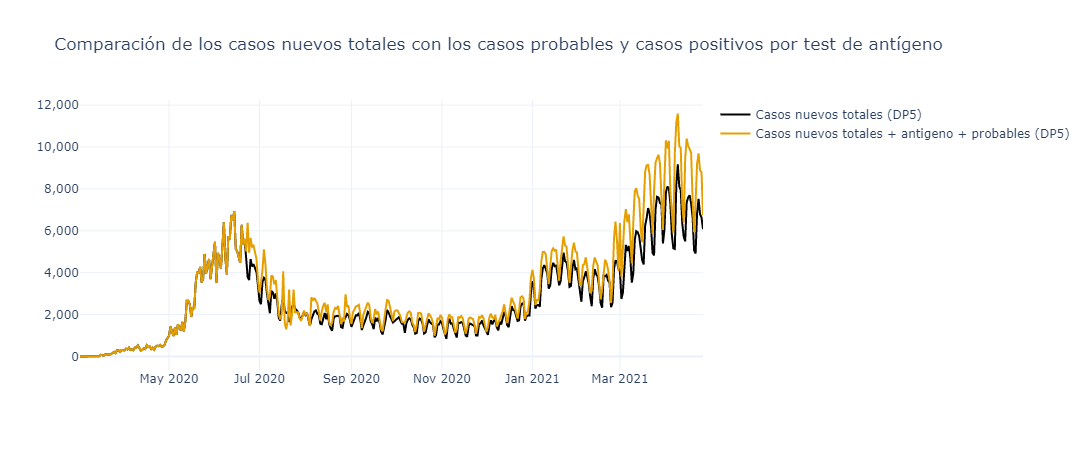

In [50]:
fig = go.Figure()
Wong = ['#000000', '#E69F00', '#56B4E9',
        '#009E73', '#F0E442', '#0072B2',
        '#D55E00', '#CC79A7']


fig.add_trace(
    go.Scatter(x=casos.index,
               y=casos['Casos nuevos totales'],
               mode='lines',
               name='Casos nuevos totales (DP5)',
               line_color=Wong[0]
              )
)
fig.add_trace(
    go.Scatter(x=casos.index,
               y=casos['Casos nuevos totales + antigeno + probables'],
               mode='lines',
               name='Casos nuevos totales + antigeno + probables (DP5)',
               line_color=Wong[1]
              )
)
fig.update_layout(hovermode='x')
fig.update_layout(template='plotly_white',
                  title='Comparación de los casos nuevos totales con los casos probables y casos positivos por test de antígeno')
fig.update_layout(yaxis_tickformat = ',')
